In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/drive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/drive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

In [3]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

%mkdir /content/drive/MyDrive/ece5545
%cd /content/drive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/drive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/drive/MyDrive/ece5545

PROJECT_ROOT = f"/content/drive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/drive/MyDrive/ece5545’: File exists
/content/drive/MyDrive/ece5545
fatal: destination path 'a4-NamanMakkar' already exists and is not an empty directory.
/content/drive/MyDrive/ece5545/a4-NamanMakkar
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.
/content/drive/MyDrive/ece5545


In [4]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

In [29]:
!ls {PROJECT_ROOT}

1-numerical_precision.ipynb
2-svd_rank.ipynb
compression_ratio_vs_acc_and_runtime.png
compression_ratio_vs_acc.png
compression_ratio_vs_runtime.png
data
errors_plot.png
fft_reconstruction_loss.png
low_rank_data.pickle
mnist.py
ranks_vs_flops_runtime_speedup.png
rank_vs_flops.png
rank_vs_flops_speedup.png
rank_vs_runtime.png
rank_vs_runtime_speedup.png
README.md
reconstruction_error_extra_creidt_logmatmul.png
reconstruction_error_logmatmul.png
src
tests
winograd_reconstruction_loss.png


In [6]:
!pip install torch numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%cd {PROJECT_ROOT}

/content/drive/MyDrive/ece5545/a4-NamanMakkar


In [8]:
!python mnist.py

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295091
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.868421
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.477974
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.639343
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.566819
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.379255
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.409109
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.252043
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.524463
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.123931
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.258341
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.414283
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.356876
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.379332
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.202911
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.419536
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.136566
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.491086
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.113257
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.097736
Train Epoch: 1 [12800/60000 (

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('low_rank_data.pickle', 'rb') as f:
  accs, compression_ratios, runtimes = pickle.load(f)

print(compression_ratios)
print(accs)
print(runtimes)

[24.901023890784984, 16.469525959367946, 12.303541315345699, 9.81965006729475, 8.170212765957446, 6.995206136145733, 6.115674769488684, 5.432613551749814, 4.886805090421969, 7.753453772582359, 6.687442713107241, 5.879129734085415, 5.2451473759884975, 4.734587929915639, 4.314606741573034, 3.9630635524171645, 3.66449020592667, 3.407753386268099, 4.591567023285085, 4.19551466359977, 3.8623610375860244, 3.5782246199117216, 3.333028780264961, 3.119281744335186, 2.931297709923664, 2.764683592269799, 2.6159913947651487, 3.261510952168082, 3.0565563468789274, 2.8758376034686637, 2.7152958689988833, 2.5717307014451887, 2.4425845329762303, 2.3257889703538415, 2.2196531791907512, 2.122781495490253, 2.5289428076256497, 2.4039538714991764, 2.2907378335949766, 2.1877061469265366, 2.0935437589670016, 2.007152682255846, 1.9276089828269485, 1.8541296060991106, 1.786046511627907, 2.0651004811774696, 1.9809937550909584, 1.9034698669449517, 1.8317850866181271, 1.7653036535204452, 1.7034788699509689, 1.645

In [22]:
def smoothen(data):
  cum_sum = [0]
  for idx,x in enumerate(data,1):
    cum_sum.append(cum_sum[idx-1] + x)
  smooth_data = []
  for idx in range(len(data) - 20 + 1):
    smooth_data.append((cum_sum[idx + 20] - cum_sum[idx])/20)
  return smooth_data
compression_ratios = smoothen(compression_ratios)
accs = smoothen(accs)
runtimes = smoothen(runtimes)

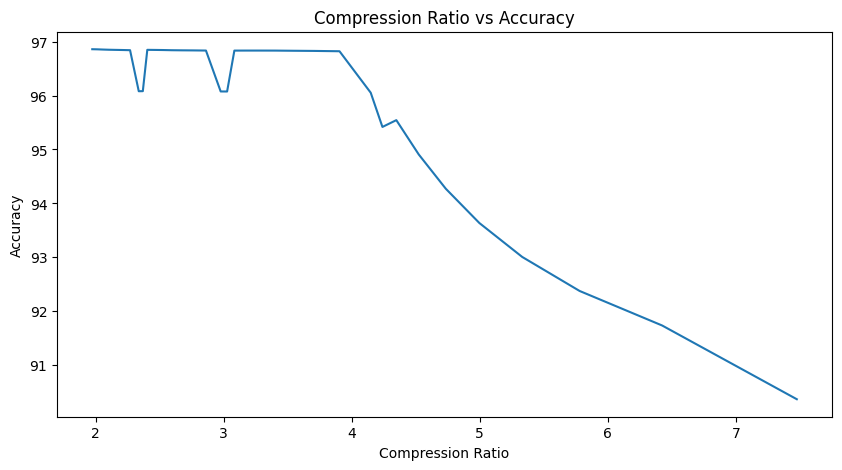

In [28]:
fig = plt.figure(figsize=(10,5))
plt.plot(compression_ratios, accs)
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')
plt.title('Compression Ratio vs Accuracy')
fig.savefig('compression_ratio_vs_acc.png')
plt.show()

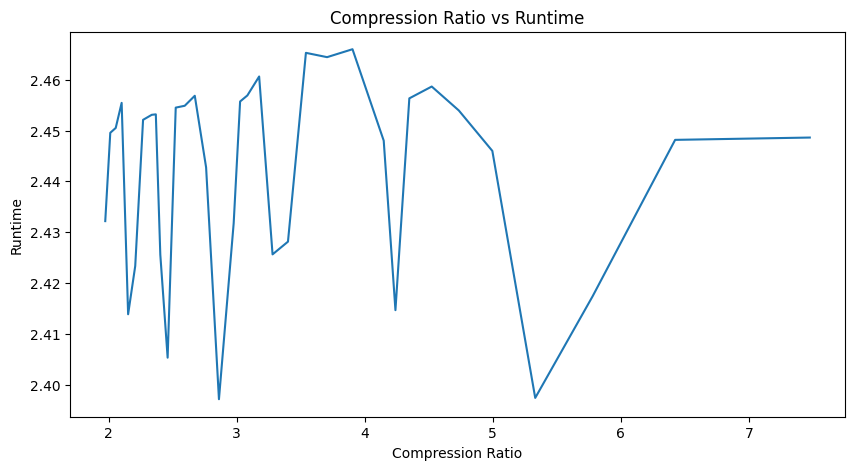

In [27]:
fig = plt.figure(figsize=(10,5))
plt.plot(compression_ratios, runtimes)
plt.xlabel('Compression Ratio')
plt.ylabel('Runtime')
plt.title('Compression Ratio vs Runtime')
fig.savefig('compression_ratio_vs_runtime.png')
plt.show()

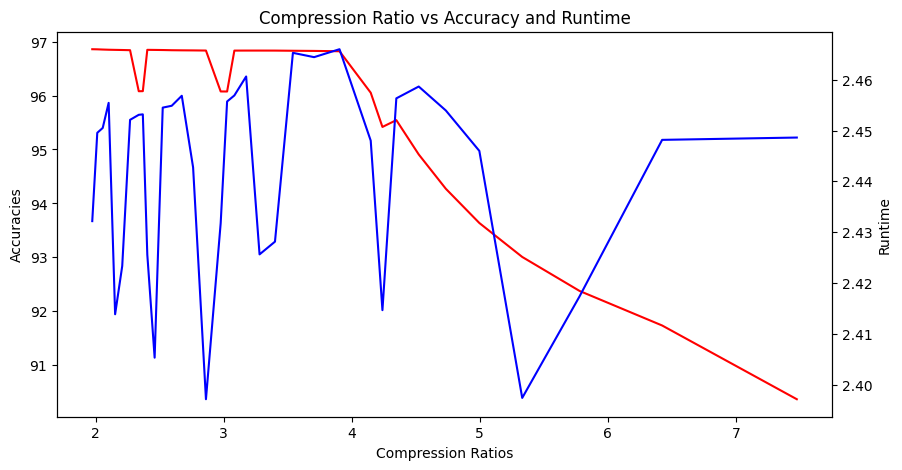

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(compression_ratios, accs, 'r')
ax.set_xlabel('Compression Ratios')
ax.set_ylabel('Accuracies')

ax2 = ax.twinx()
ax2.plot(compression_ratios, runtimes, 'b')
ax2.set_ylabel('Runtime')
plt.title('Compression Ratio vs Accuracy and Runtime')
fig.savefig('compression_ratio_vs_acc_and_runtime.png')
plt.show()